In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [25]:
df = pd.read_csv("Interactions_Continuous.csv")
df

,Strength,Temperature,Pressure,Time
0,100.666667,100.59,81.10,33.32
1,97.777778,109.50,72.38,32.92
2,88.444444,103.98,74.62,35.32
3,85.444444,99.39,65.04,35.00
4,93.185185,107.25,67.42,32.80
5,95.518519,103.38,68.28,32.56
6,97.740741,103.80,69.70,32.12
7,98.703704,106.14,71.78,31.86
8,84.851852,107.55,67.06,33.20
9,88.629630,107.04,67.58,32.82


In [20]:
temp = df["Temperature"]
press = df["Pressure"]
time = df["Time"]
stren = df["Strength"]

In [26]:
df["TempxPress"] = df["Temperature"] * df["Pressure"]
df["TempxPress"] = df["Temperature"] * df["Pressure"]

X = df.loc[:, ["Temperature", "Pressure", "Time", "TempxPress"]] 
Y = df.loc[:, ["Strength"]]

#! Without time temp's p-value falls apart. why? Time is a control variable (ceterius paribus) -> i.e. because some are based on low/high time, and so the effect of temp/pressure is small.
#! Maybe if I add another variable into consideration for linear regression we'll increase interaction?

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                 -0.059
Method:                 Least Squares   F-statistic:                    0.4799
Date:                Wed, 13 Jul 2022   Prob (F-statistic):              0.699
Time:                        13:08:43   Log-Likelihood:                -101.83
No. Observations:                  29   AIC:                             211.7
Df Residuals:                      25   BIC:                             217.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -662.5069    954.504     -0.694      

ValueError: Must be a color for each trace level

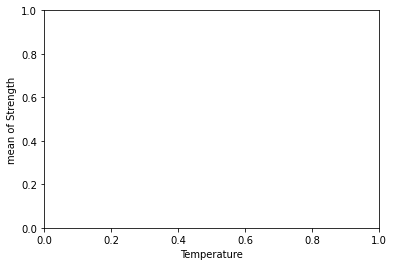

In [22]:
fig = sm.graphics.interaction_plot(temp,temp*press, stren, colors=["red", "blue", "Green"])